In [49]:
import numpy as np
import pandas as pd
#import seaborn as sns
#IMPORTING AND CALIBRATING MATPLOTLIB
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [50]:
#Upload Dilan Travel guide unique users into Dataframe
Dilan_Users = pd.read_csv('new_readers.csv', delimiter=';', names = ['my_date', 'event_type', 'country','user_id', 'source','topic'])

In [51]:
Dilan_Users.head(10) 

,my_date,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America
5,2018-01-01 00:05:42,read,country_6,2458151266,Reddit,North America
6,2018-01-01 00:06:06,read,country_2,2458151267,Reddit,Europe
7,2018-01-01 00:06:15,read,country_6,2458151268,AdWords,Europe
8,2018-01-01 00:07:21,read,country_7,2458151269,AdWords,North America
9,2018-01-01 00:07:29,read,country_5,2458151270,Reddit,North America


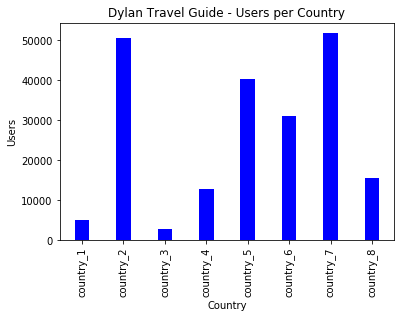

           user_id
country           
country_1     5076
country_2    50675
country_3     2742
country_4    12751
country_5    40349
country_6    31156
country_7    51791
country_8    15483


In [52]:
###This section of code is to identify all users by Country.
x = Dilan_Users['country'].unique() #Get unique list of country
x = pd.Series(x).sort_values() #pandas method to sort values
y = Dilan_Users.groupby(['country']).count()[['user_id']]
ind = np.arange(len(x))
width = .35
plt1 = plt.bar(x, y['user_id'], width, color='b') 
plt.xlabel('Country')
plt.xticks(ind, x, rotation='vertical')
plt.ylabel('Users')
plt.title('Dylan Travel Guide - Users per Country')
plt.show()
print(y)

In [53]:
#Upload Dilan Travel guide buyers into Dataframe
Dilan_Buyers = pd.read_csv('all_buyers.csv', delimiter=';', names = ['my_date', 'event_type', 'user_id','price'])

In [54]:
Dilan_Buyers.head(10)

,my_date,event_type,user_id,price
0,2018-01-01 04:04:59,buy,2458151555,8
1,2018-01-01 09:28:00,buy,2458151933,8
2,2018-01-01 13:23:16,buy,2458152245,8
3,2018-01-01 14:20:43,buy,2458152315,8
4,2018-01-01 16:56:04,buy,2458152371,8
5,2018-01-01 17:01:42,buy,2458152371,80
6,2018-01-01 18:59:49,buy,2458152315,80
7,2018-01-02 02:57:43,buy,2458153264,8
8,2018-01-02 03:48:38,buy,2458151481,8
9,2018-01-02 05:25:38,buy,2458152579,8


In [55]:
#Get the list of users that purchased (buyers) Dylan travel guide
step_1 = Dilan_Users.merge(Dilan_Buyers, how = 'left', left_on = 'user_id', right_on = 'user_id')
#Fill Null values with zero's
step_2 = step_1.fillna(0)
#Get the total amount of revenue (price) for each country
step_3 = step_2.groupby('country').sum()[['price']]

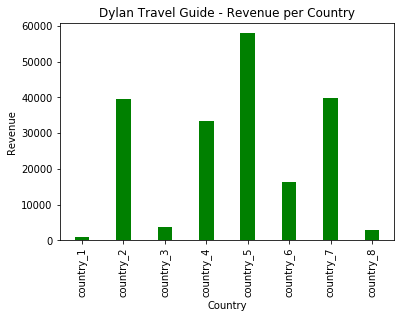

             price
country           
country_1    920.0
country_2  39528.0
country_3   3616.0
country_4  33464.0
country_5  57920.0
country_6  16432.0
country_7  39760.0
country_8   2840.0


In [56]:
x = Dilan_Users['country'].unique() #Get unique list of country
x = pd.Series(x).sort_values() #pandas method to sort values
y = step_3 #revenue for each country
ind = np.arange(len(x))
width = .35
plt1 = plt.bar(x, y['price'], width, color='g') 
plt.xlabel('Country')
plt.xticks(ind, x, rotation='vertical')
plt.ylabel('Revenue')
plt.title('Dylan Travel Guide - Revenue per Country')
plt.show()
print(y)

In [57]:
#Get the total amount of revenue (price) for each country, source
step_5 = step_2.groupby(['source']).sum()[['price']]
step_5

,price
source,
AdWords,27664.0
Reddit,89760.0
SEO,77056.0


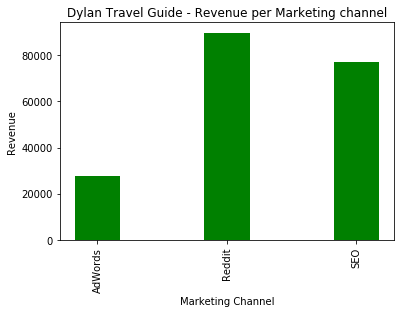

           price
source          
AdWords  27664.0
Reddit   89760.0
SEO      77056.0


In [58]:
x = Dilan_Users['source'].unique() #Get unique list of country
x = pd.Series(x).sort_values() #pandas method to sort values
y = step_5 #revenue for each country
ind = np.arange(len(x))
width = .35
plt1 = plt.bar(x, y['price'], width, color='g') 
plt.xlabel('Marketing Channel')
plt.xticks(ind, x, rotation='vertical')
plt.ylabel('Revenue')
plt.title('Dylan Travel Guide - Revenue per Marketing channel')
plt.show()
print(y)

In [59]:
#Get the total average of revenue (price) per user for each country
step_6 = step_2.groupby(['country']).mean()[['price']]

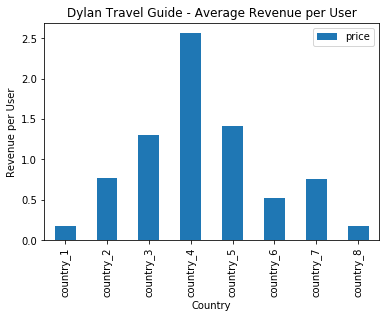

              price
country            
country_1  0.180924
country_2  0.774709
country_3  1.302594
country_4  2.562916
country_5  1.417003
country_6  0.524867
country_7  0.762431
country_8  0.183108


In [60]:
x = Dilan_Users['country'].unique() #Get unique list of country
x = pd.Series(x).sort_values() #pandas method to sort values
y = step_6 #revenue for each country
ind = np.arange(len(x))
width = .35

#Display the bar chart
step_6.plot.bar()
plt.xlabel('Country')
plt.xticks(ind, x, rotation='vertical')
plt.ylabel('Revenue per User')
plt.title('Dylan Travel Guide - Average Revenue per User')
plt.show()
print(y)